# Master Notebook with Combined Results

This notebook combines all relevant trial data and will apply statistical methods to the combined results. 

Currently it includes an overall $T$-$\omega_0$ plot. We are working on adding a linear model with metrics to this chart.

In [1]:
import sys
sys.path.append('..')

from analyse.prelude import *

In [2]:
trials, meta = load_files(['round2', 'round3', 'round4'])

for trial in trials:
    add_angular_momentum(trial, PRQ_I)

[INFO] Processing '../data/round2/Gyroscope rotation rate 2025-01-23 18-29-01/Raw Data.csv' ...
[INFO] Processing '../data/round3/Gyroscope rotation rate 2025-02-14 09-35-02/Raw Data.csv' ...
[INFO] Processing '../data/round3/Gyroscope rotation rate 2025-02-14 10-47-18/Raw Data.csv' ...
[INFO] -> discarding segment 28
[INFO] Processing '../data/round4/Gyroscope rotation rate 2025-02-23 13-16-45/Raw Data.csv' ...
[INFO] -> discarding segment 5
[INFO] Processing '../data/round4/Gyroscope rotation rate 2025-02-23 13-28-34/Raw Data.csv' ...
[INFO] -> discarding segment 1
[INFO] -> discarding segment 2
[INFO] -> discarding segment 3
[INFO] -> discarding segment 4
[INFO] -> discarding segment 5
[INFO] -> discarding segment 6
[INFO] -> discarding segment 10
[INFO] -> discarding segment 40
[INFO] Found 113 trials in 5 files.


0   -0.013348
1   -0.017395
2   -0.032429
3   -0.021599
4   -0.023520
dtype: float64
tau = -0.04820528188718842 ± 0.025928400220383944


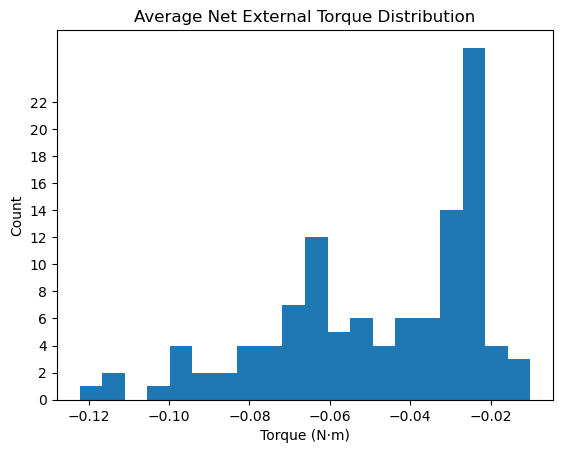

In [3]:
first_row = []
last_row = []
for trial in trials:
    #print(trial.iloc[0])
    first_row.append(trial.iloc[0])
    last_row.append(trial.iloc[-1])
first_row = pd.DataFrame(first_row).reset_index(drop=True)
last_row  = pd.DataFrame(last_row).reset_index(drop=True)
L0 = np.sqrt(first_row['Lx']**2 + first_row['Ly']**2 + first_row['Lz']**2)
Lf = np.sqrt(last_row['Lx']**2 + last_row['Ly']**2 + last_row['Lz']**2)
delta_L = Lf - L0
#print(last_row.iloc[0])
delta_T = last_row['Time (s)'] - first_row['Time (s)']
average_torque = delta_L / delta_T
tau = average_torque.mean()

print(average_torque.head())
dtau = average_torque.std()
print('tau =', tau, '±', dtau)

# make histogram of torques

plt.hist(average_torque, bins=20)
plt.xlabel('Torque (N⋅m)')
plt.ylabel('Count')
plt.title('Average Net External Torque Distribution')
plt.yticks(np.arange(0, 24, 2))
plt.show()


In [4]:
trials = filter_trials(trials, 1.1)
print('Number of filtered trials:', len(trials))

Number of filtered trials: 92


[INFO] Trial 1: source '../data/round3/Gyroscope rotation rate 2025-02-14 09-35-02' #19
[INFO] Comment: Intermediate axis rotation


<Figure size 640x480 with 0 Axes>

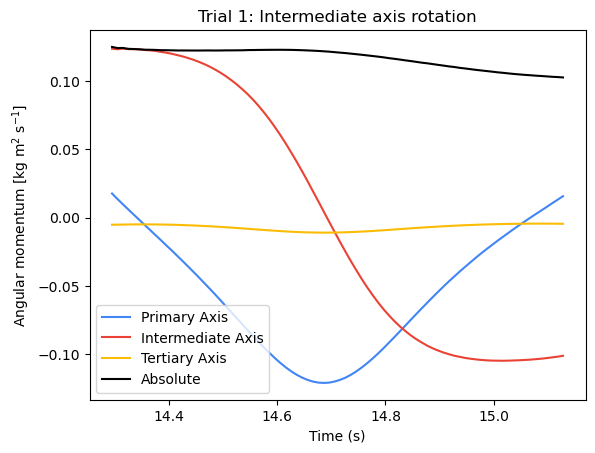

In [5]:
plot_trials_L([trials[24]], [meta[24]])

[WARNING] zero method returned no results
[INFO] Skipping segment 0 of '../data/round2/Gyroscope rotation rate 2025-01-23 18-29-01' ...
Results for segment 1 of ../data/round2/Gyroscope rotation rate 2025-01-23 18-29-01:
-> initial angular speed: 6.44 rad/s
-> period: 1.3699 ± inf seconds (rel. inf%)
Results for segment 2 of ../data/round2/Gyroscope rotation rate 2025-01-23 18-29-01:
-> initial angular speed: 9.82 rad/s
-> period: 1.2657 ± inf seconds (rel. inf%)
Results for segment 3 of ../data/round2/Gyroscope rotation rate 2025-01-23 18-29-01:
-> initial angular speed: 6.76 rad/s
-> period: 1.5361 ± inf seconds (rel. inf%)
Results for segment 4 of ../data/round2/Gyroscope rotation rate 2025-01-23 18-29-01:
-> initial angular speed: 7.96 rad/s
-> period: 1.2863 ± inf seconds (rel. inf%)
Results for segment 0 of ../data/round3/Gyroscope rotation rate 2025-02-14 09-35-02:
-> initial angular speed: 7.72 rad/s
-> period: 1.3259 ± inf seconds (rel. inf%)
Results for segment 1 of ../data/r

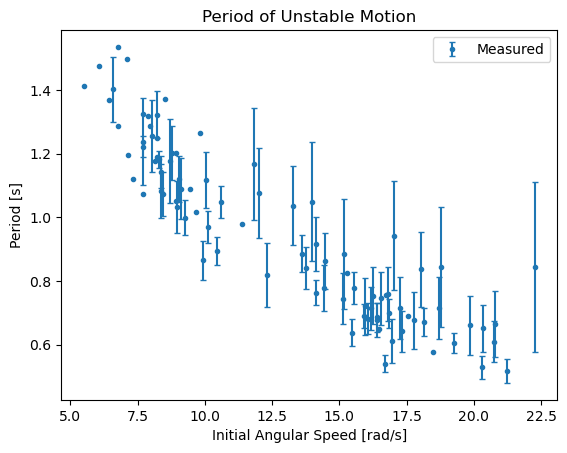

[INFO] Parameter #1: -5.156578e-02 ± 1.7e-03, relative error: -0.03
[INFO] Parameter #2: 1.555956e+00 ± 2.6e-02, relative error: 0.02


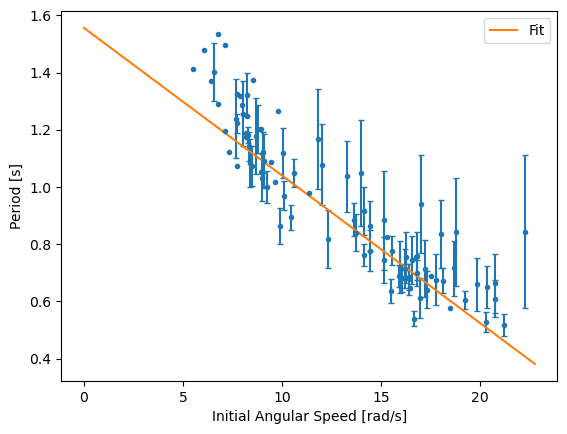

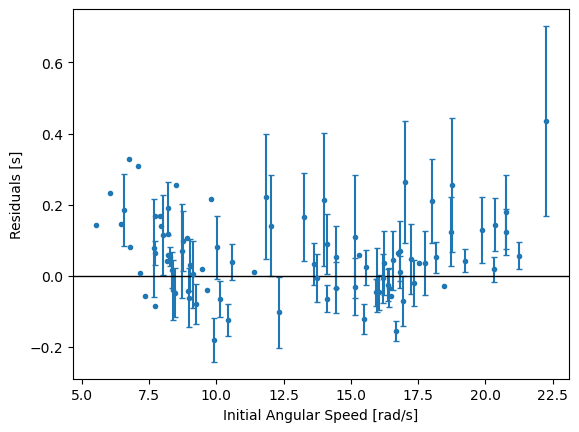

[INFO] Chi squared: 1.51


In [6]:
period_data = point_trial_periods(trials, meta, plot_points=False)

plot_speed_vs_period(period_data)

fit_model(period_data)

[INFO] Trial 1: source '../data/round2/Gyroscope rotation rate 2025-01-23 18-29-01' #0
[INFO] Comment: Intermediate axis rotation


<Figure size 640x480 with 0 Axes>

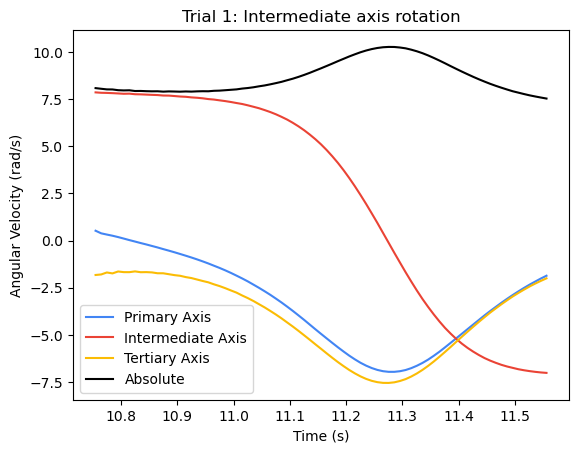

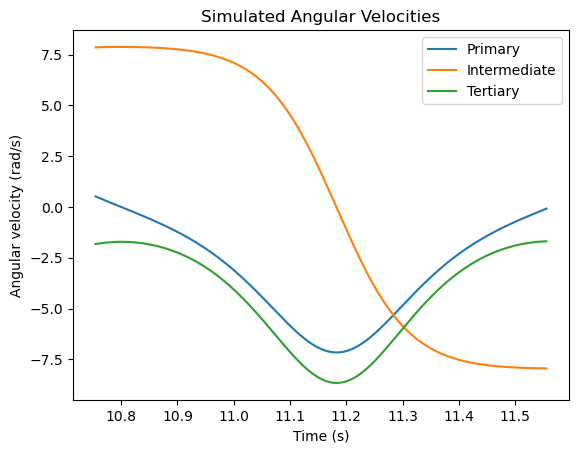

Simulated period: 1.4285714285714284
Real period: 1.3699110470944618
Difference: 0.05866038147696662
[INFO] Trial 1: source '../data/round2/Gyroscope rotation rate 2025-01-23 18-29-01' #1
[INFO] Comment: Intermediate axis rotation


<Figure size 640x480 with 0 Axes>

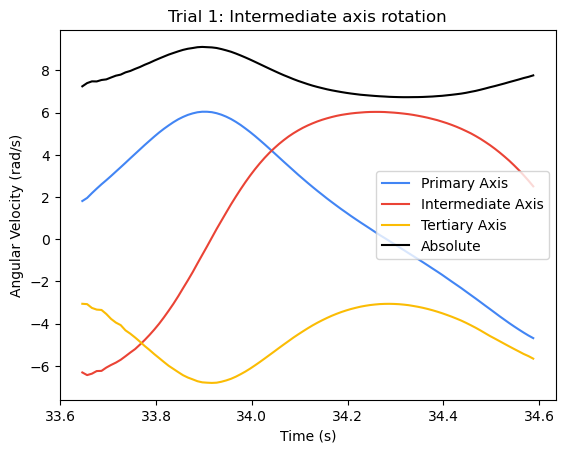

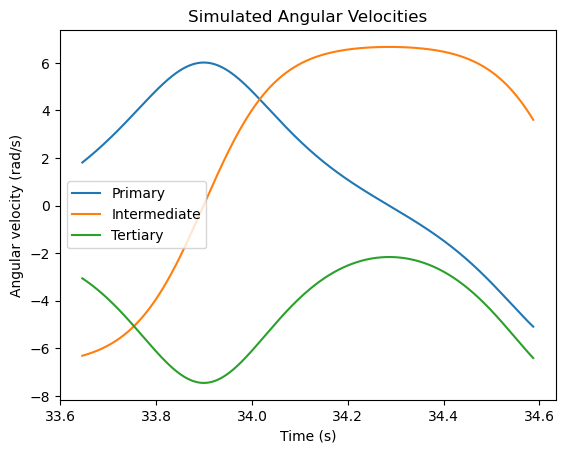

Simulated period: 1.6666666666666665
Real period: 1.2656531733891825
Difference: 0.40101349327748403
[INFO] Trial 1: source '../data/round2/Gyroscope rotation rate 2025-01-23 18-29-01' #2
[INFO] Comment: Intermediate axis rotation


<Figure size 640x480 with 0 Axes>

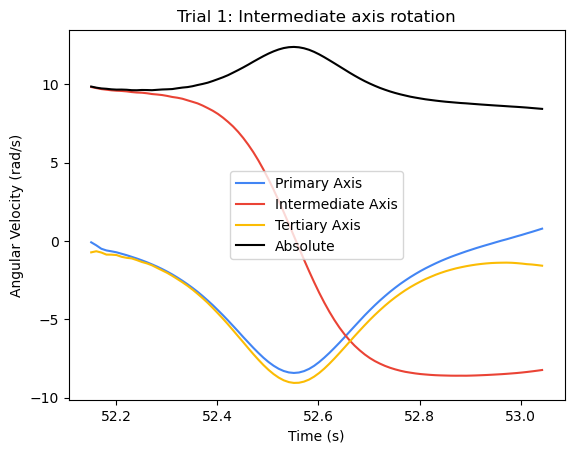

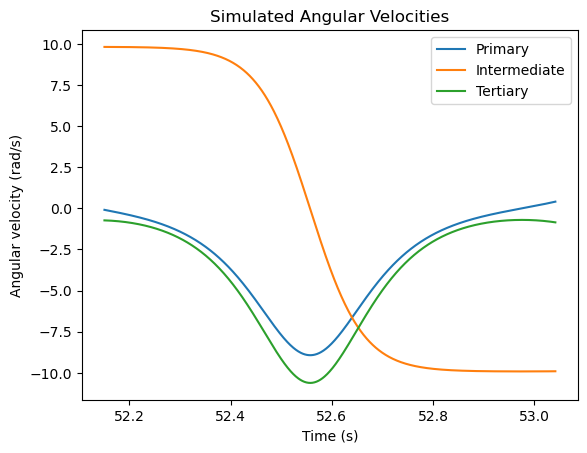

Simulated period: 1.6666666666666665
Real period: 1.5361481607216092
Difference: 0.13051850594505732
[INFO] Trial 1: source '../data/round2/Gyroscope rotation rate 2025-01-23 18-29-01' #3
[INFO] Comment: Intermediate axis rotation


<Figure size 640x480 with 0 Axes>

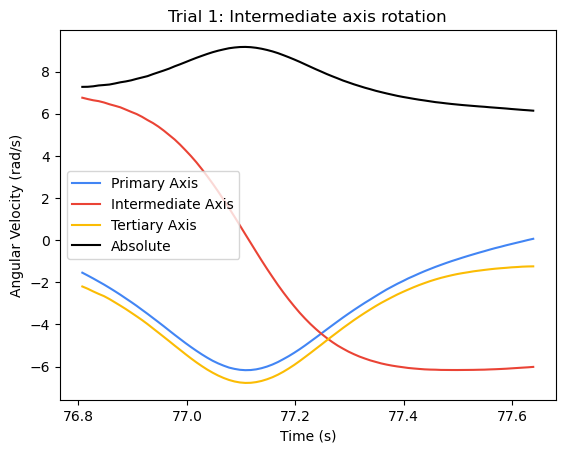

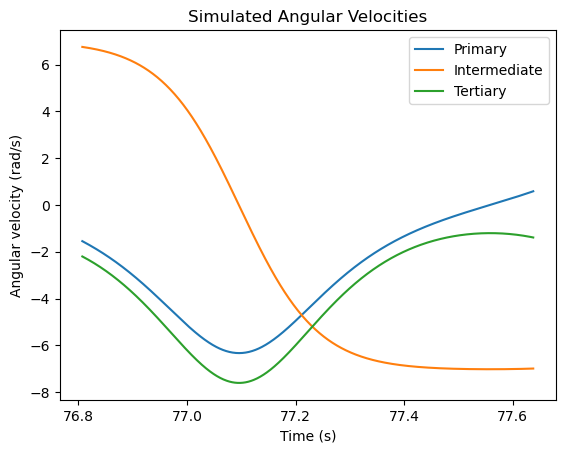

Simulated period: 2.0
Real period: 1.2863056432299231
Difference: 0.7136943567700769
[INFO] Trial 1: source '../data/round2/Gyroscope rotation rate 2025-01-23 18-29-01' #4
[INFO] Comment: Intermediate axis rotation


<Figure size 640x480 with 0 Axes>

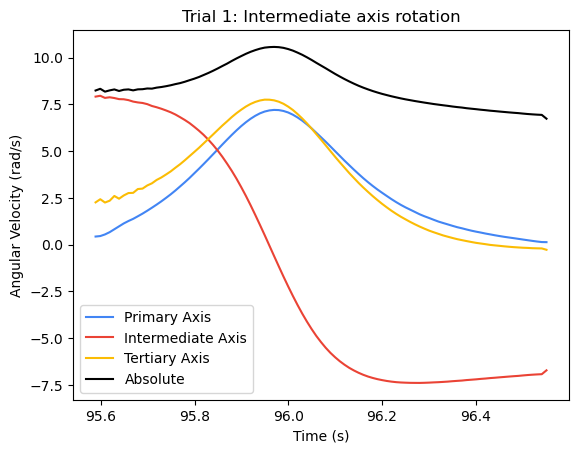

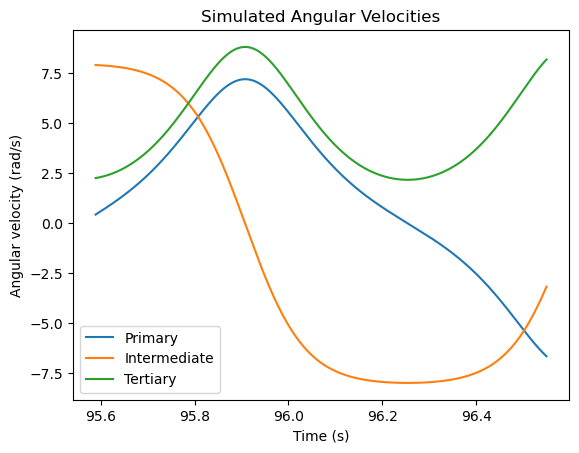

Simulated period: 1.4285714285714284
Real period: 1.3259319302700447
Difference: 0.10263949830138364


In [7]:
for index, trial in enumerate(trials[:5]):
    plot_trials_w([trial], [meta[index]])
    simulate(trial, 0.001)
    num_sim_period = simulate_period(trial, 0.001)
    print('Simulated period:', num_sim_period)
    real_period = period_data.iloc[index]['T']
    print('Real period:', real_period)
    print('Difference:', num_sim_period - real_period)

In [11]:
diffs = []
for index, trial in enumerate(trials[:15]):
    num_sim_period = simulate_period(trial, 0.0001)
    #print('Simulated period:', num_sim_period)
    real_period = period_data.iloc[index]['T']
    #print('Real period:', real_period)
    #print('Difference:', num_sim_period - real_period)
    diffs.append(num_sim_period - real_period)
print('Average difference:', np.mean(diffs))

Average difference: 0.13355951884203915
